In [1]:
from google.colab import files
uploaded = files.upload()

Saving IBM HR Analytics.csv to IBM HR Analytics.csv


In [2]:
import pandas as pd
df=pd.read_csv('IBM HR Analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Step 1: EDA Performing

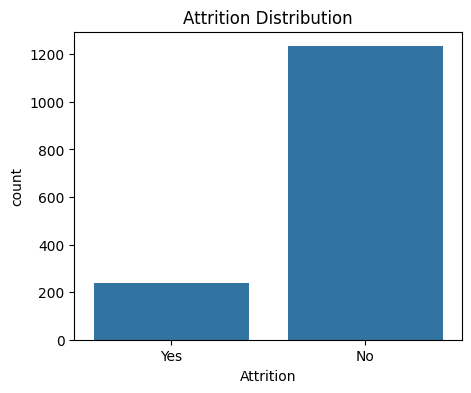

In [3]:
# Attrition Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

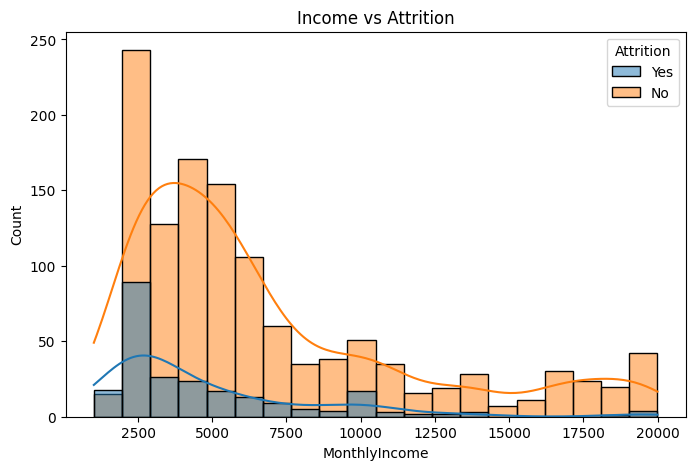

In [4]:
#Comparing Income and Attrition

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True)
plt.title("Income vs Attrition")
plt.show()

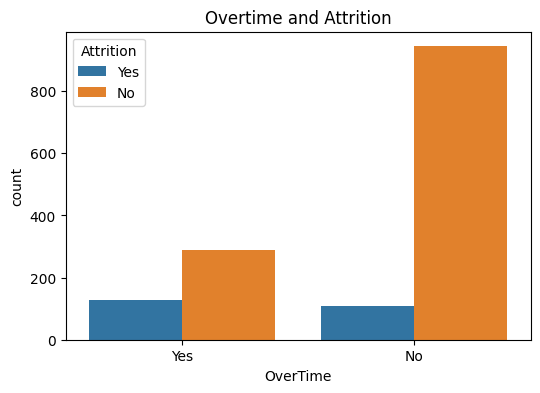

In [5]:
#Overtime vs Attrition

plt.figure(figsize=(6, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Overtime and Attrition")
plt.show()

Step 2: Data Preprocessing and Model Training

In [6]:
#Encoding Attrition

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [7]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

In [8]:
#Split data
from sklearn.model_selection import train_test_split
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [10]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.71      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.79      0.54      0.54       441
weighted avg       0.85      0.87      0.82       441



In [ ]:
Step 3: For Explaining the model We use Shap

<Figure size 640x480 with 0 Axes>

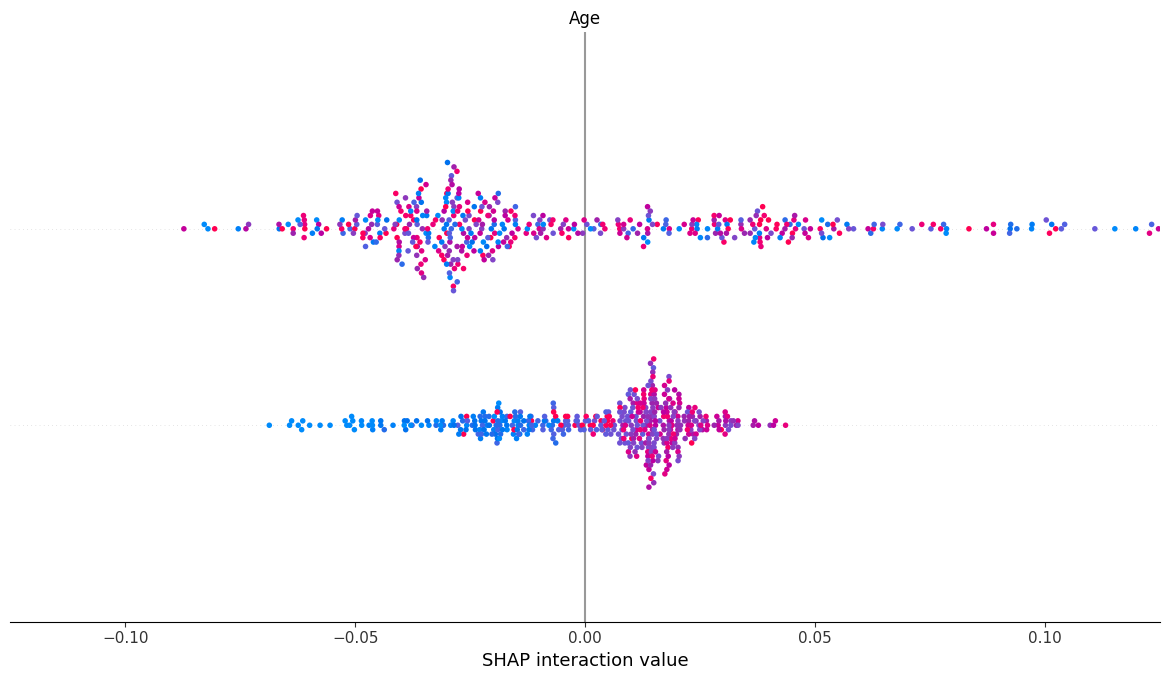

<Figure size 640x480 with 0 Axes>

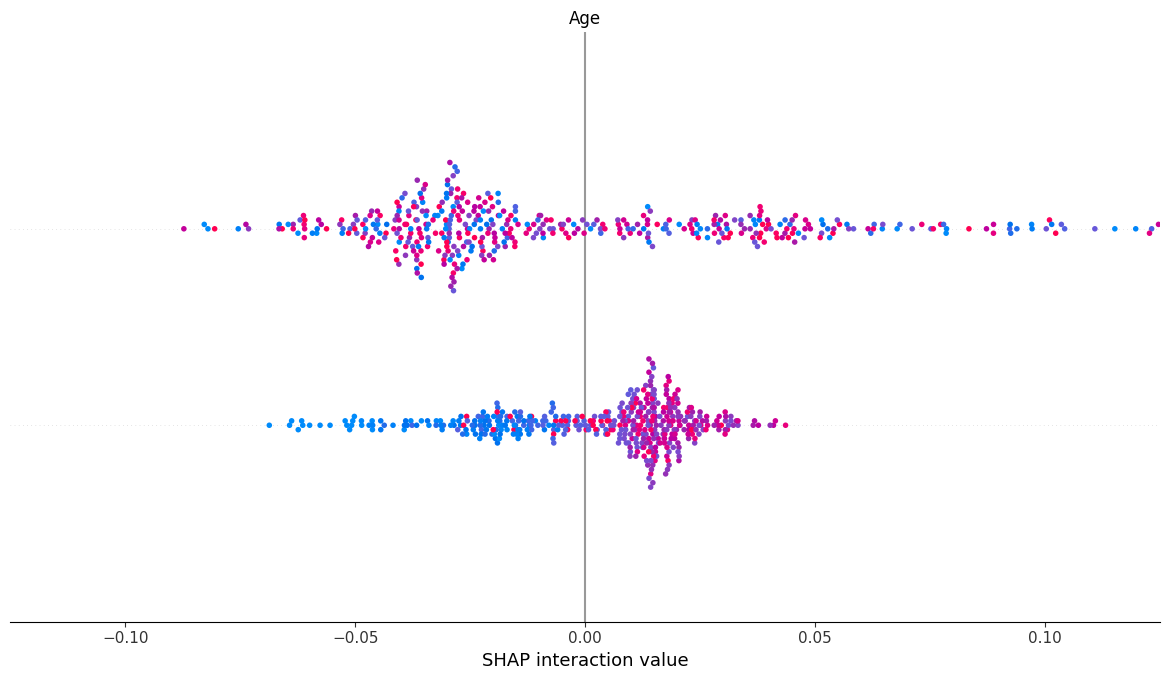

In [11]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

Step 4: Practical Steps to Help Keep Employees Longer
1. Limit Overtime Work

Too much overtime can cause stress and tiredness, leading employees to feel burned out. To avoid this, the company should reduce how often staff are asked to work extra hours. Encouraging a healthy balance between work and personal time can help employees feel more satisfied.

2. Increase Job Satisfaction

When people don’t enjoy their work, they are more likely to leave. It’s important for managers to listen to employee concerns regularly and create a positive and motivating work environment. Even small changes based on feedback can make a big difference.

3. Provide Competitive Salaries

Employees who feel they are underpaid may look for better opportunities elsewhere. Ensuring that salaries are fair and based on the effort and skills required for the job is essential. Rewarding good performance with raises or bonuses can also improve loyalty.

4. Offer Flexible Work Options

Employees who live far away might find the daily commute difficult. Allowing remote work or giving flexible schedules (like starting earlier or later) can make their work-life easier and reduce the chance of them leaving.

5. Support New Hires Early

New employees are often unsure during their first year. Providing them with proper training, regular check-ins, and guidance from experienced staff can help them feel confident and supported — making them more likely to stay with the company.